In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.integrate import quad, nquad, dblquad
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime
from pathlib import Path
import pickle as pkl
import glob
import os
my_path = Path('/home/adameshel/Documents/code/autocorr/TRY/')
# from autocorr_functions import *

In [3]:
import autocorr_cmls as accml

In [4]:
full_expr = False # Full or simplified expression
alpha_beta_95 = False # When false alpha and beta are optimized
printing = True

In [5]:
## Trying to add gamma below
# def acf_original(h, alpha, beta):
#     return beta * np.exp(-(h/alpha)**2) 

# def acf(t1,t2,h,L,theta,phi=-999):
#     '''Auto-Correlation Function'''
#     # the full expression under the sqrt
#     if phi != -999: 
#         sq = t2**2 + (h/L)**2 + 2*t2*(h/L)*np.cos(theta-phi) +\
#         t1**2 -2*t1*(t2*np.sin(theta)+(h/L)*np.sin(phi)) + 1e-8
#     # the short expression where theta=phi
#     else: 
#         sq = (t2+(h/L))**2 + t1**2 -2*t1*(t2+(h/L))*np.sin(theta) + 1e-8
#     if sq < 0:
#         print(sq, theta, phi)
#     return beta * np.exp((-L * np.sqrt(sq)) / alpha)

# def Rr_ang(h,L,thetas,phis,full_expr=False):
#     '''Function that loops over thetas and returns 
#     the solution to the double integral of acf, for the simplified expression,
#     where theta equals phi (False) and for the full one (True).'''
#     rs = []
#     if full_expr is False:
#         phis = np.array([-999])  
#     for theta in thetas:
#         r = []
#         for phi in phis:    
#             # perform the double integral
#             result, err = nquad(acf,[[-0.5,0.5],[-0.5,0.5]],args=(h,L,theta,phi))#,
# #                                 opts=[{'epsabs' : 1.49e-1,
# #                                        'epsrel' : 1.49e-1,
# #                                        'limit' : 2},
# #                                       {'epsabs' : 1.49e-1,
# #                                        'epsrel' : 1.49e-1,
# #                                        'limit' : 2},
# #                                       {},{}])
#             r.append(result)
#         r = np.array(r)
#         rs.append(r)
#     rs = np.array(rs)
#     return rs, np.nanmean(rs) 

# def compute_acf(hs,L,pic=0,printing=False):
#     avgs = []
#     i = 0; j = 0
#     c = np.linspace(0.0,1.2,int(len(hs)/3)+1)
#     for h in hs:
#         acf_theta, avg = Rr_ang(h,L,thetas,phis,full_expr=full_expr) 
#         avgs.append(avg)
#         if printing and i%3==0:
#             temp = h/L
#             col = (c[j]/1.5, c[j]/1.5, c[j]/1.5)
#             j += 1
#             ax[pic].plot(thetas, acf_theta, color=col, label='h/L=%.2f' %temp)
#         i += 1
#     return np.array(avgs)

# def alpha_L(x,a,alpha_0):
#     return a*x + alpha_0
# #     return a*x + alpha_0/x
# #     return alpha_0*np.exp(x/(a*alpha_0))

# def beta_L(x,b,beta_0):
#     return beta_0*np.exp(-x/(b*alpha_0))
# #     return alpha_0*b*x + beta_0

# def alpha_L_inv(x,a,alpha,bias=0):
#     alpha_0 = alpha - a*x - bias
#     return alpha_0

# def beta_L_inv(x,b,beta,alpha_0):
#     beta_0 = beta / (np.exp(-x/(b*alpha_0)))
# #     beta_0 = beta / (alpha_0*b*x)
#     return beta_0

# def alpha_beta(hs, Rr_mat, Ls, alpha_beta_95=False, printing=False):
#     hc_l = [] # correlation distance list
#     s_l = [] # sill list
#     c = np.linspace(0.0,1.0,len(Rr_mat[:,0])+1)
#     for i in range(len(Rr_mat[:,0])):
#         if printing:
#             gs = np.array([c[i]/1.5, c[i]/1.5, c[i]/1.5])
#             l = 'L=%.2f' %Ls[i]
#             ax[0].plot(hs,Rr_mat[i],color=gs,label=l)
#             ax[0].legend()
#         if alpha_beta_95:
#             # Max value of ACF
#             s_l.append(Rr_mat[i][0])
#             # Correlatio distance as the h where 
#             #the value of ACF decreases in 95%
#             hc_l.append(hs[np.sum(Rr_mat[i] >= np.nanmax(Rr_mat[i]) * 0.05) -1])
#         else:

#             popt, _ = curve_fit(f=acf_original, 
#                                    xdata=hs, 
#                                    ydata=Rr_mat[i])
#             alpha_opt, beta_opt = popt

#             s_l.append(beta_opt)
#             hc_l.append(alpha_opt)
#     betas = np.array(s_l)
#     alphas = np.array(hc_l)
#     return alphas, betas

# def bias(x, b):
#     '''bias term in linear fit'''
#     return x + b

# def combine_legend_subplots(i,xy=(2.8,1.01),fs=12):
#     '''
#     fs : font size
#     '''
#     handles, labels = ax[i].get_legend_handles_labels()
#     labels, ids = np.unique(labels, return_index=True)
#     handles = [handles[i] for i in ids]
#     lgd = ax[i].legend(handles, labels, loc='best', bbox_to_anchor=xy, fontsize=fs)
#     return lgd

In [580]:
def acf_original(h, alpha, beta):
    return beta * np.exp(-(h/alpha))

def acf_original_gamma(h, alpha, beta, gamma=1.0):
    return beta * np.exp(-(h/alpha)**gamma)

def acf(t1,t2,h,L,theta,phi=-999):
    '''Auto-Correlation Function'''
    # the full expression under the sqrt
    if phi != -999: 
        sq = t2**2 + (h/L)**2 + 2*t2*(h/L)*np.cos(theta-phi) +\
        t1**2 -2*t1*(t2*np.sin(theta)+(h/L)*np.sin(phi)) + 1e-8
    # the short expression where theta=phi
    else: 
        sq = (t2+(h/L))**2 + t1**2 -2*t1*(t2+(h/L))*np.sin(theta) + 1e-8
    if sq < 0:
        print(sq, theta, phi)
    return beta * np.exp(-((L * np.sqrt(sq)) / alpha))

def Rr_ang(h,L,thetas,phis,full_expr=False):
    '''Function that loops over thetas and returns 
    the solution to the double integral of acf, for the simplified expression,
    where theta equals phi (False) and for the full one (True).'''
    rs = []
    if full_expr is False:
        phis = np.array([-999])  
    for theta in thetas:
        r = []
        for phi in phis:    
            # perform the double integral
            result, err = nquad(acf,[[-0.5,0.5],[-0.5,0.5]],args=(h,L,theta,phi))#,
#                                 opts=[{'epsabs' : 1.49e-1,
#                                        'epsrel' : 1.49e-1,
#                                        'limit' : 2},
#                                       {'epsabs' : 1.49e-1,
#                                        'epsrel' : 1.49e-1,
#                                        'limit' : 2},
#                                       {},{}])
            r.append(result)
        r = np.array(r)
        rs.append(r)
    rs = np.array(rs)
    return rs, np.nanmean(rs) 

def compute_acf(hs,L,pic=0,printing=False):
    avgs = []
    i = 0; j = 0
    c = np.linspace(0.0,1.2,int(len(hs)/3)+1)
    for h in hs:
        acf_theta, avg = Rr_ang(h,L,thetas,phis,full_expr=full_expr) 
        avgs.append(avg)
        if printing and i%3==0:
            temp = h/L
            col = (c[j]/1.5, c[j]/1.5, c[j]/1.5)
            j += 1
            ax[pic].plot(thetas, acf_theta, color=col, label='h/L=%.2f' %temp)
        i += 1
    return np.array(avgs)

# def alpha_L(x,a,alpha_0):
#     return a*x + alpha_0
#     return a*x + alpha_0/x
#     return alpha_0*np.exp(x/(a*alpha_0))

def beta_L(x,b,beta_0):
    return beta_0*np.exp(-x/(b*alpha_0))
#     return alpha_0*b*x + beta_0

def gamma_L(x,c1,c2):
#     return c*x + 1
    return c1*x**c2 + 1

def alpha_L_inv(x,a,alpha,bias=0):
    alpha_0 = alpha - a*x - bias
    return alpha_0

def beta_L_inv(x,b,beta,alpha_0):
    beta_0 = beta / (np.exp(-x/(b*alpha_0)))
#     beta_0 = beta / (alpha_0*b*x)
    return beta_0

def alpha_beta(hs, Rr_mat, Ls, alpha_beta_95=False, printing=False):
    hc_l = [] # correlation distance list
    s_l = [] # sill list
    c = np.linspace(0.0,1.0,len(Rr_mat[:,0])+1)
    for i in range(len(Rr_mat[:,0])):
        if printing:
            gs = np.array([c[i]/1.5, c[i]/1.5, c[i]/1.5])
            l = 'L=%.2f' %Ls[i]
            ax[0].plot(hs,Rr_mat[i],color=gs,label=l)
            ax[0].legend()
        if alpha_beta_95:
            # Max value of ACF
            s_l.append(Rr_mat[i][0])
            # Correlatio distance as the h where 
            #the value of ACF decreases in 95%
            hc_l.append(hs[np.sum(Rr_mat[i] >= np.nanmax(Rr_mat[i]) * 0.05) -1])
        else:
            popt, _ = curve_fit(f=acf_original, 
                                   xdata=hs, 
                                   ydata=Rr_mat[i])
            alpha_opt, beta_opt = popt

            s_l.append(beta_opt)
            hc_l.append(alpha_opt)
    betas = np.array(s_l)
    alphas = np.array(hc_l)
    return alphas, betas

def alpha_beta_gamma(hs, Rr_mat, Ls, printing=False):
    hc_l = [] # correlation distance list
    s_l = [] # sill list
    g_l = [] # gamma list
    c = np.linspace(0.0,1.0,len(Rr_mat[:,0])+1)
    for i in range(len(Rr_mat[:,0])):
        if printing:
            gs = np.array([c[i]/1.5, c[i]/1.5, c[i]/1.5])
            l = 'L=%.2f' %Ls[i]
            ax[0].plot(hs,Rr_mat[i],color=gs,label=l)
            ax[0].legend()
        try:
            popt, _ = curve_fit(
                f=acf_original_gamma, 
                xdata=hs, 
                ydata=Rr_mat[i],
                p0=[1,1,1],
                bounds=[0,(1e4,np.inf,7)]
            )
            alpha_opt, beta_opt, gamma_opt = popt
        except:
            alpha_opt = np.nan#hs[np.sum(Rr_mat[i] >= np.nanmax(Rr_mat[i]) * 0.05) -1] / 3.0
            beta_opt = np.nan#Rr_mat[i][0] 
            gamma_opt = np.nan

        s_l.append(beta_opt)
        hc_l.append(alpha_opt)
        g_l.append(gamma_opt)
    betas = np.array(s_l)
    alphas = np.array(hc_l)
    gammas = np.array(g_l)
    return alphas, betas, gammas

def exclude_nans(alphas, betas, gammas, Ls):
    ##############################
    ######## exclude nans ########
    ##############################
    bool_data = ~np.isnan(alphas,dtype=bool)
    alphas = np.compress(bool_data,alphas)
    betas = np.compress(bool_data,betas)
    gammas = np.compress(bool_data,gammas)
    Ls = np.compress(bool_data,Ls)
    ##############################
    ####### done with nans #######
    ##############################
    return alphas, betas, gammas, Ls
    

def bias(x, b):
    '''bias term in linear fit'''
    return x + b

def combine_legend_subplots(i,xy=(2.8,1.01),fs=12):
    '''
    fs : font size
    '''
    handles, labels = ax[i].get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    lgd = ax[i].legend(handles, labels, loc='best', bbox_to_anchor=xy, fontsize=fs)
    return lgd

0:08:17.609145


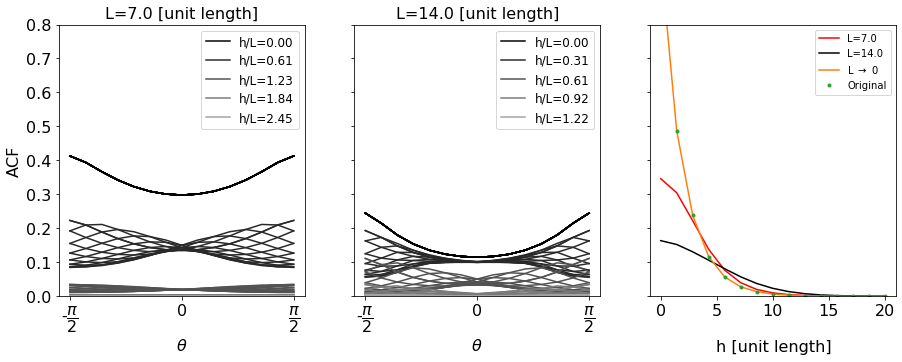

In [83]:
fs = 16
then = datetime.datetime.now()
pic = 0
factor = 2.0
eps = 0.0

# Define parameters
alpha = 2.0
beta = 1.0
thetas = np.linspace(-np.pi/2+eps, np.pi/2-eps, 15)#20
phis = np.linspace(-np.pi/2+eps, np.pi/2-eps, 15)#20
L = 7.0
def make_hs():
    hs = np.linspace(0.01,20.0,15)#15
    return hs
hs = make_hs()

if printing:
    fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
Rr = compute_acf(hs,L,pic,printing)
pic += 1
maxy = np.nanmax(Rr) * 2
if printing:
    ax[2].plot(hs,Rr,'r',label='L=%.1f' %L)
    if full_expr is False:
        ax[0].set_xlabel(r'$\theta$',fontsize=fs)
    else:
        ax[0].set_xlabel(r'$\theta$',fontsize=fs)
    ax[0].set_ylabel('ACF',fontsize=fs)
#     ax[0].legend()
    ax[0].set_title('L=%.1f [unit length]' %L,fontsize=fs)

L = L * factor
Rr = compute_acf(hs,L,pic,printing)
if printing:
    ax[2].plot(hs,Rr,'k',label='L=%.1f' %L)
    if full_expr is False:
        ax[1].set_xlabel(r'$\theta$',fontsize=fs)
    else:
        ax[1].set_xlabel(r'$\theta$',fontsize=fs)
    ax[1].legend()
    ax[1].set_title('L=%.1f [unit length]' %L,fontsize=fs)
    ax[2].set_xlabel('h [unit length]',fontsize=fs)
combine_legend_subplots(0,xy=(1.0,1.0))
combine_legend_subplots(1,xy=(1.0,1.0))

### Sanity check 
L = 0.01
Rr = compute_acf(hs,L,printing=False)
maxy = np.nanmin((np.nanmax(Rr),maxy))
if printing:
    ax[2].plot(hs,Rr,'C1',label=r'L $\rightarrow$ 0')

Rr_orig = []
for h in hs:
    temp = acf_original(h, alpha, beta)
    Rr_orig.append(temp)
Rr_orig = np.array(Rr_orig)
if printing:
    ax[2].plot(hs,Rr_orig,'.C2',label='Original')
    ax[2].legend()

ax[0].set_xticks([-np.pi/2.0,0.0,np.pi/2.0])
ax[1].set_xticks([-np.pi/2.0,0.0,np.pi/2.0])
ax[0].set_xticklabels([r'-$\dfrac{\pi}{2}$', '0', r'$\dfrac{\pi}{2}$'])
ax[1].set_xticklabels([r'-$\dfrac{\pi}{2}$', '0', r'$\dfrac{\pi}{2}$'])
ax[0].tick_params(labelsize=fs); ax[1].tick_params(labelsize=fs);
ax[2].tick_params(labelsize=fs);
ax[2].xaxis.set_label_coords(10.5+(hs[0]-hs[-1])/2, -0.16) # (hs[0]-hs[-1])/2
# ax[2].set_ylim(0,maxy)
ax[2].set_ylim(0,0.8)
print(datetime.datetime.now() - then)
fig.savefig(my_path.joinpath('theta_and_phi' + str(full_expr) + '.png'), bbox_inches='tight')

[13.5584799   5.07731099  1.70140926]
[11.64530884  5.70383593]


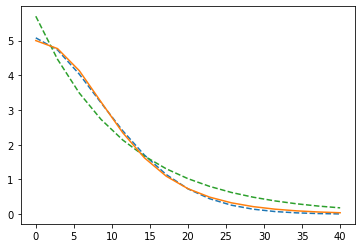

In [42]:
def make_hs():
    hs = np.linspace(0.01,40.0,15)#15
    return hs
hs = make_hs()
fs = 16
pic = 0
factor = 2.0
eps = 0.0
thetas = np.linspace(-np.pi/2+eps, np.pi/2-eps, 15)#20
phis = np.linspace(-np.pi/2+eps, np.pi/2-eps, 15)#20

L = 15.0; alpha = 7.0; beta = 10.0;# gamma = 2.5; 
Rr = compute_acf(hs,L,printing=False)
popt, pcov = curve_fit(f=acf_original_gamma, 
                       xdata=hs, 
                       ydata=Rr,
                       p0=[1,1,1],
                    bounds=[0,(1e4,np.inf,7)])
alpha1_opt, beta1_opt, gamma1_opt = popt
print(popt)

popt, pcov = curve_fit(f=acf_original, 
                       xdata=hs, 
                       ydata=Rr)
alpha2_opt, beta2_opt, = popt
print(popt)
fig, ax = plt.subplots()
ax.plot(hs,acf_original_gamma(hs,alpha1_opt,beta1_opt,gamma1_opt), '--C0')
ax.plot(hs,acf_original(hs,alpha2_opt,beta2_opt), '--C2')
ax.plot(hs, Rr, 'C1')

In [17]:
Ls = np.linspace(0.01,20.0,5)
    
Rr_mat = np.zeros((len(Ls),len(hs)))
total_time = datetime.datetime.now() - datetime.datetime.now()
for i,L in enumerate(Ls):
    then = datetime.datetime.now()
    print(L)
    Rr_mat[i,:] = compute_acf(hs, L)
    now = datetime.datetime.now()
    diff = now-then
    print('diff=%s' % diff)
    total_time += diff
    print('total=%s' % total_time)
    print('\n')

## Pickle data
data = [Ls, hs, Rr_mat, alpha, beta]
with open(my_path.joinpath('Ls_hs_Rrmat_a_%ib_%i' %(alpha,beta) + str(full_expr) + '.dat'), 'wb') as f:
    pkl.dump(len(data), f)
    for var in data:
        pkl.dump(var, f)
f.close()

0.01
diff=0:00:00.761592
total=0:00:00.761590


5.007499999999999
diff=0:00:02.671619
total=0:00:03.433209


10.004999999999999
diff=0:00:06.865036
total=0:00:10.298245


15.0025
diff=0:00:12.140025
total=0:00:22.438270


20.0
diff=0:00:16.490064
total=0:00:38.928334




### Restore pickled data

In [335]:
my_path = Path('/home/adameshel/Documents/code/autocorr/simple_large_run/')
data2 = []
alpha = 5; beta = 1;
with open(my_path.joinpath('Ls_hs_Rrmat_a_%ib_%i' %(alpha,beta) + str(full_expr) + '.dat'), 'rb') as f:
    for _ in range(pkl.load(f)):
        data2.append(pkl.load(f))
f.close()
Ls=data2[0]; hs=data2[1]; Rr_mat=data2[2]; alpha=data2[3]; beta=data2[4]
print('alpha is %.3f' %alpha)
print('beta is %.3f' %beta)

alpha is 5.000
beta is 1.850


### Restore pickled data from newer dirs

In [621]:
my_path = Path('/home/adameshel/Documents/code/autocorr/with_gamma/')
files  = os.listdir(my_path)
file = np.random.choice(files,1)[0]
while 'Ls_' not in file:
    file = np.random.choice(files,1)[0]
print(file)
data2 = []

with open(my_path.joinpath(file), 'rb') as f:
    for _ in range(pkl.load(f)):
        data2.append(pkl.load(f))
f.close()
Ls=data2[0]; hs=data2[1]; Rr_mat=data2[2]; alpha=data2[3]; beta=data2[4]
print('alpha is %.3f' %alpha)
print('beta is %.3f' %beta)

Ls_hs_Rrmat_a_2200b_2420False.dat
alpha is 22.000
beta is 24.200


[0.01399662 1.15878447]


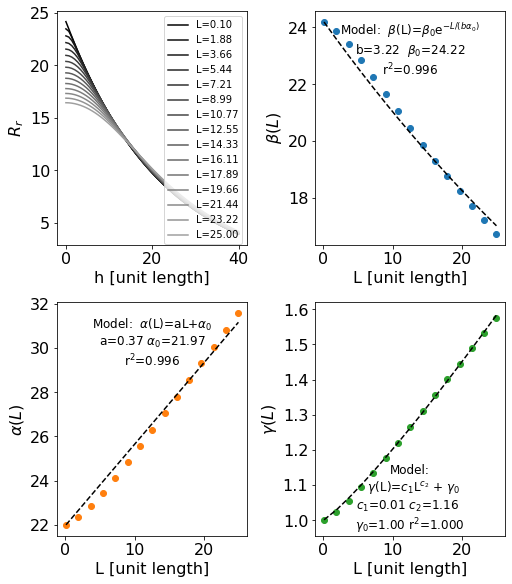

In [622]:
# betas = np.array(s_l)
# alphas = np.array(hc_l)
gamma_in = False

def alpha_L(x,a,alpha_0):
#     return (a**c2)*x + alpha_0
#     return (a**(c2))*x + alpha_0
#     return alpha_0*np.exp(a*x)
    return a*x + alpha_0
fs = 16
fig, ax = plt.subplots(2,2,figsize=(7,8), constrained_layout=True)
alphas, betas, gammas = alpha_beta_gamma(hs, Rr_mat, Ls, printing=False)
sigma = np.ones_like(alphas)
sigma[0] = 1/1e5
if gamma_in==False:
    g_in = np.ones_like(gammas)
else:
    g_in = gammas
c = np.linspace(0.0,1.0,len(Rr_mat[:,0])+1)
for i in range(len(Rr_mat[:,0])):
    gs = np.array([c[i]/1.5, c[i]/1.5, c[i]/1.5])
    l = 'L=%.2f' %Ls[i]
    ax[0,0].plot(hs,Rr_mat[i],color=gs,label=l)
    ax[0,0].legend()
ax[0,1].scatter(Ls,betas,c='C0')
# ax[0,1].legend()
ax[1,0].scatter(Ls,alphas*g_in,c='C1')
# ax[1,0].legend()
ax[1,1].scatter(Ls,gammas,c='C2')
# ax[3].legend()

ax[0,0].set_xlabel('h [unit length]',fontsize=fs)
ax[0,1].set_xlabel('L [unit length]',fontsize=fs)
ax[1,0].set_xlabel('L [unit length]',fontsize=fs)
ax[0,0].set_ylabel('$R_r$',fontsize=fs)
ax[0,1].set_ylabel(r'$\beta(L)$',fontsize=fs)
ax[1,0].set_ylabel(r'$\alpha(L)$',fontsize=fs)
ax[1,1].set_xlabel('L [unit length]',fontsize=fs)
ax[1,1].set_ylabel(r'$\gamma(L)$',fontsize=fs)

ax[0,0].tick_params(labelsize=fs)
ax[0,1].tick_params(labelsize=fs)
ax[1,0].tick_params(labelsize=fs)
ax[1,1].tick_params(labelsize=fs)

pgamma, _ = curve_fit(f=gamma_L,xdata=Ls,ydata=gammas)#,bounds=[0,1], p0=[0.1])
c1, c2 = pgamma
print(pgamma)
line = gamma_L(Ls, c1, c2)
r2 = round(np.corrcoef(gammas,line)[0,1],3)**2
ax[1,1].plot(Ls,line,'--k')
ax[1,1].set_title(r'Model:''\n''  $\gamma$(L)=$c_1$L$^{c_2}$ + $\gamma_0$'
                '\n'r'$c_1$=%.2f $c_2$=%.2f  ''\n''$\gamma_0$=%.2f r$^2$=%.3f' %(c1, c2, 1, r2),
                 fontsize=fs-4, y=0.0);

palpha, _ = curve_fit(f=alpha_L,xdata=Ls,ydata=alphas*g_in,sigma=sigma)
a, alpha_0 = palpha
line = alpha_L(Ls, a, alpha_0)
r2 = round(np.corrcoef(alphas*g_in,line)[0,1],3)**2
ax[1,0].plot(Ls,line,'--k')
ax[1,0].set_title(r'Model:  $\alpha$(L)=aL+$\alpha_0$'
                '\n'r'a=%.2f $\alpha_0$=%.2f''\n''r$^2$=%.3f' %(a, alpha_0, r2),
                 fontsize=fs-4, y=0.7)
# ax[2].set_title(r'Model:  $\alpha(L)=$$\alpha_0$e$^{L/(a\alpha_0)}$'
#                 '\n'r'a=%.2f  $\alpha_0$=%.2f''\n''r$^2$=%.3f' %(a, alpha_0, r2))

pbeta, _ = curve_fit(f=beta_L,xdata=Ls,ydata=betas,sigma=sigma)
b, beta_0 = pbeta
line = beta_L(Ls, b, beta_0)
r2 = round(np.corrcoef(betas,line)[0,1],3)**2
ax[0,1].plot(Ls,line,'--k')
ax[0,1].set_title(r'Model:  $\beta$(L)=$\beta_0$e$^{-L/(b\alpha_0)}$'
                '\n'r'b=%.2f  $\beta_0$=%.2f''\n''r$^2$=%.3f' %(b, beta_0, r2),
                 fontsize=fs-4, y=0.7);

# fig.savefig(my_path.joinpath('alpha%i_beta%i_gamma' %(alpha*10,beta*10)\
#                              + str(full_expr) + '.png'), bbox_inches='tight')

In [435]:
alpha_L()

array([ 2.33184912,  3.0720794 ,  3.85759892,  4.68666059,  5.54500316,
        6.42698147,  7.3293254 ,  8.24912244,  9.18367013, 10.13067278,
       11.08808305, 12.05409008, 13.02728525, 14.00651329, 14.99076097])

In [315]:
gammas

array([1.01091381, 1.36109458, 1.77006603, 1.95748547, 2.0905817 ,
       2.20578835, 2.29724527, 2.38003888, 2.45008254, 2.51549004,
       2.57255335, 2.62639583, 2.67396576])

In [438]:
alphas*gammas

array([ 2.36043946,  4.01072327,  5.97476993,  8.17566835, 10.51411108,
       12.94663142, 15.4613727 , 18.05470357, 20.72361433, 23.46501472,
       26.27435686, 29.14552954, 32.072872  , 35.05081692, 38.07310084])

Text(0.5, 1.0, 'Model:  $\\beta$(L)=$\\beta_0$e$^{-L/(b\\alpha_0)}$\nb=4.10  $\\beta_0$=5.01\nr$^2$=1.000')

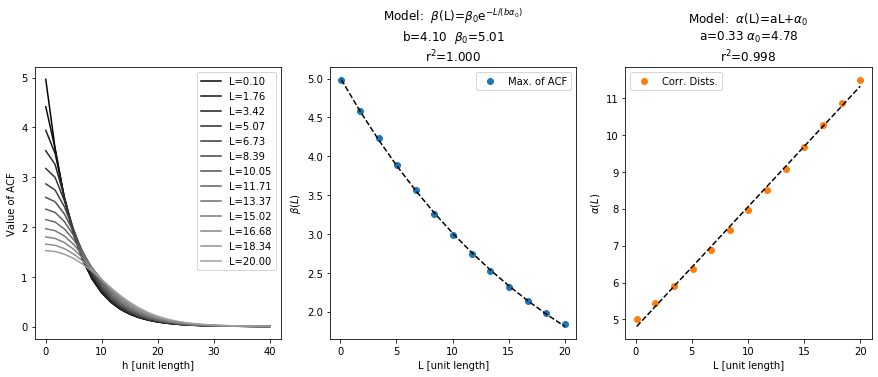

In [11]:
# betas = np.array(s_l)
# alphas = np.array(hc_l)
fig, ax = plt.subplots(1,3,figsize=(15,5))
alphas, betas = alpha_beta(hs, Rr_mat, Ls, alpha_beta_95=alpha_beta_95, printing=True)

ax[1].scatter(Ls,betas,c='C0',label='Max. of ACF')
ax[1].legend()
ax[2].scatter(Ls,alphas,c='C1',label='Corr. Dists.')
ax[2].legend()

ax[0].set_xlabel('h [unit length]')
ax[1].set_xlabel('L [unit length]')
ax[2].set_xlabel('L [unit length]')
ax[0].set_ylabel('Value of ACF')
ax[1].set_ylabel(r'$\beta(L)$')
ax[2].set_ylabel(r'$\alpha(L)$')

palpha, _ = curve_fit(f=alpha_L,xdata=Ls,ydata=alphas)
a, alpha_0 = palpha
line = alpha_L(Ls, a, alpha_0)
r2 = round(np.corrcoef(alphas,line)[0,1],3)**2
ax[2].plot(Ls,line,'--k')
ax[2].set_title(r'Model:  $\alpha$(L)=aL+$\alpha_0$'
                '\n'r'a=%.2f $\alpha_0$=%.2f''\n''r$^2$=%.3f' %(a, alpha_0, r2))
# ax[2].set_title(r'Model:  $\alpha(L)=$$\alpha_0$e$^{L/(a\alpha_0)}$'
#                 '\n'r'a=%.2f  $\alpha_0$=%.2f''\n''r$^2$=%.3f' %(a, alpha_0, r2))

pbeta, _ = curve_fit(f=beta_L,xdata=Ls,ydata=betas)
b, beta_0 = pbeta
line = beta_L(Ls, b, beta_0)
r2 = round(np.corrcoef(betas,line)[0,1],3)**2
ax[1].plot(Ls,line,'--k')
ax[1].set_title(r'Model:  $\beta$(L)=$\beta_0$e$^{-L/(b\alpha_0)}$'
                '\n'r'b=%.2f  $\beta_0$=%.2f''\n''r$^2$=%.3f' %(b, beta_0, r2))
fig.savefig(my_path.joinpath('alpha%i_beta%i_' %(alpha*10,beta*10) + str(full_expr) + '.png'), 
            bbox_inches='tight')

In [32]:
# my_path = Path('/home/adameshel/Documents/code/autocorr/with_gamma/')
data2 = []
file = glob.glob(str(my_path.joinpath('as_*.dat')))
with open(file[0], 'rb') as f:
    for _ in range(pkl.load(f)):
        data2.append(pkl.load(f))
f.close()
set_of_alphas = data2[0]
set_of_betas = data2[1]

### In case there was a distributed run and you want to gather results in one dir
This is only for the `as_and_bsFalse.dat` file. The rest should be transfered manually.

In [161]:
gamma_list_of_lists = []
set_of_alphas = np.array([]); set_of_betas = np.array([]);
a_all = []; b_all = [];
r2a_all = []; r2b_all = [];
for i in range(5):
    data_current = []
    dr = Path('/home/adameshel/Documents/code/autocorr/' + 'with_gamma%s/' %str(i+1))
    file = glob.glob(str(dr.joinpath('as_*.dat')))
    with open(file[0], 'rb') as f:
        for _ in range(pkl.load(f)):
            data_current.append(pkl.load(f))
    f.close()
    if i==0:
        Ls = data_current[6]
    set_of_alphas = np.append(set_of_alphas, data_current[0])
    set_of_betas = np.append(set_of_betas, data_current[1])
    a_all.append(data_current[2].tolist())
    b_all.append(data_current[3].tolist())
    r2a_all.append(data_current[4].tolist())
    r2b_all.append(data_current[5].tolist())
    for j in range(np.shape(data_current[7])[0]):
        gamma_list_of_lists.append(data_current[7][j])
a_all = np.concatenate(a_all)
b_all = np.concatenate(b_all)
r2a_all = np.concatenate(r2a_all)
r2b_all = np.concatenate(r2b_all)

data = [set_of_alphas, set_of_betas, a_all, b_all, r2a_all, r2b_all, Ls, gamma_list_of_lists]
dr = Path('/home/adameshel/Documents/code/autocorr/' + 'with_gamma/')
with open(dr.joinpath('as_and_bsFalse.dat'), 'wb') as f:
    pkl.dump(len(data), f)
    for var in data:
        pkl.dump(var, f)
f.close()

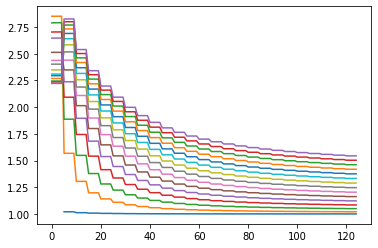

In [168]:
plt.plot(gamma_list_of_lists)

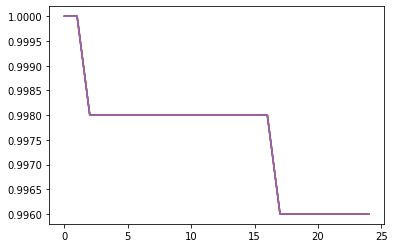

In [177]:
plt.plot(r2a_all)

In [629]:
my_path = Path('/home/adameshel/Documents/code/autocorr/with_gamma/')
data2 = []
file = glob.glob(str(my_path.joinpath('as_*.dat')))
with open(file[0], 'rb') as f:
    for _ in range(pkl.load(f)):
        data2.append(pkl.load(f))
f.close()
set_of_alphas = data2[0]
set_of_betas = data2[1]

print('a       ','b     ','alpha', 'alpha_0','beta', 'beta_0', ' c1', ' c2')
a_all = []
b_all = [] 
c1_all = []
c2_all = []
alpha_0_all = []
beta_0_all = []
alpha_all = []
beta_all = []

files = sorted(glob.glob(str(my_path.joinpath('Ls*.dat'))))
for i, file in enumerate(files):
    data2 = []
    with open(file, 'rb') as f:
        for _ in range(pkl.load(f)):
            data2.append(pkl.load(f))
    f.close()
    
    Ls=data2[0]; hs=data2[1]; Rr_mat=data2[2]; 
    alpha=data2[3]; beta=data2[4];
    
    alphas, betas, gammas = alpha_beta_gamma(
        hs, 
        Rr_mat, 
        Ls,  
        printing=False
    )
    alphas, betas, gammas, Ls = exclude_nans(alphas, betas, gammas, Ls)
    ## for weighted least squares
    sigma = np.ones_like(alphas)
    sigma[0] = 1/1e5
    
    pgamma, _ = curve_fit(f=gamma_L,xdata=Ls,ydata=gammas)#,bounds=[0,1], p0=[0.1])
    c1, c2 = pgamma
    c1_all.append(c1)
    c2_all.append(c2)
    line = gamma_L(Ls, c1, c2)
    r2c = round(np.corrcoef(gammas,line)[0,1],3)**2
    palpha, erra = curve_fit(f=alpha_L,xdata=Ls,ydata=alphas)
    a, alpha_0 = palpha
    a_all.append(a)
    line = alpha_L(Ls, a, alpha_0)
    r2a = round(np.corrcoef(alphas,line)[0,1],3)**2
    pbeta, errb = curve_fit(f=beta_L,xdata=Ls,ydata=betas)
    b, beta_0 = pbeta
    line = beta_L(Ls, b, beta_0)
    r2b = round(np.corrcoef(betas,line)[0,1],3)**2
    if r2a < 0.9 or r2b < 0.9:
        print(r2a, r2b)
    b_all.append(b)
    print(round(a,6),round(b,6), round(alpha,3), round(alpha_0,3), round(beta,3), round(beta_0,3), i)
    alpha_0_all.append(alpha_0)
    beta_0_all.append(beta_0)
    alpha_all.append(alpha)
    beta_all.append(beta)
a_all = np.array(a_all); alpha_0_all = np.array(alpha_0_all); alpha_all = np.array(alpha_all);
b_all = np.array(b_all); beta_0_all = np.array(beta_0_all); beta_all = np.array(beta_all);
c1_all = np.array(c1_all); c2_all = np.array(c2_all);

print('\n')
change_of_b = abs((np.nanmax(b_all)-np.nanmin(b_all)))/np.nanmax(b_all)*1e2
change_of_a = abs((np.nanmax(a_all)-np.nanmin(a_all)))/np.nanmax(a_all)*1e2
change_of_alpha = abs((0.5-5.0))/0.5*100
print('Relative change of a is %.3f percent' %(change_of_a/change_of_alpha*1e2))
print('Relative change of b is %.3f percent' %(change_of_b/change_of_alpha*1e2))
print('Change of a with alpha is %.3f percent' %(abs((a_all[0]-a_all[-1]))/abs((0.5-5.0))*1e2))
print('Change of b with alpha is %.3f percent' %(abs((b_all[0]-b_all[-1]))/abs((0.5-5.0))*1e2))

df = pd.DataFrame({'a': a_all,
                   'b': b_all,
                   'alpha': alpha_all,
                   'alpha_0': alpha_0_all,
                   'beta': beta_all,
                   'beta_0': beta_0_all,
                  'c1': c1_all,
                  'c2': c2_all})
df = df.sort_values(by='alpha')
df.reset_index(inplace=True,drop=True)

a        b      alpha alpha_0 beta beta_0  c1  c2
1.0 0.021025
0.616208 1.0 0.1 -0.171 0.1 -0.0 0
1.0 0.006241
0.610896 1.0 0.1 -0.079 1.2 -0.0 1
1.0 0.021025
0.616233 1.0 0.1 -0.171 2.3 0.0 2
1.0 0.006241
0.610866 1.0 0.1 -0.079 3.4 -0.0 3
1.0 0.021025
0.616233 1.0 0.1 -0.171 4.5 0.0 4
0.445762 3.224655 11.0 10.55 11.0 11.204 5
0.445763 3.224655 11.0 10.55 12.1 12.324 6
0.445763 3.224655 11.0 10.55 13.2 13.445 7
0.445763 3.224655 11.0 10.55 14.3 14.565 8
0.445763 3.224654 11.0 10.55 15.4 15.686 9
0.541511 5.294219 1.2 0.869 0.1 0.096 10
0.541509 5.294191 1.2 0.869 1.2 1.151 11
0.541509 5.294202 1.2 0.869 2.3 2.205 12
0.541509 5.294204 1.2 0.869 3.4 3.26 13
0.541509 5.294207 1.2 0.869 4.5 4.315 14
0.441687 3.197474 12.1 11.633 11.0 11.214 15
0.441687 3.197474 12.1 11.633 12.1 12.335 16
0.441687 3.197473 12.1 11.633 13.2 13.456 17
0.441687 3.197473 12.1 11.633 14.3 14.578 18
0.441687 3.197474 12.1 11.633 15.4 15.699 19
0.437553 3.174385 13.2 12.718 11.0 11.219 20
0.437553 3.174385 13.2 

/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.369797 -150654519.600097 26.4 25.855 26.4 22.99 89
0.4935 3.909914 3.4 3.073 0.1 0.098 90
0.4935 3.909911 3.4 3.073 1.2 1.173 91
0.4935 3.909911 3.4 3.073 2.3 2.247 92
0.4935 3.909911 3.4 3.073 3.4 3.322 93
0.4935 3.909911 3.4 3.073 4.5 4.397 94
0.480385 3.660344 4.5 4.172 0.1 0.099 95
0.480384 3.660342 4.5 4.172 1.2 1.189 96
0.480384 3.660342 4.5 4.172 2.3 2.278 97
0.480384 3.660342 4.5 4.172 3.4 3.368 98
0.480384 3.660342 4.5 4.172 4.5 4.457 99
0.471848 3.520358 5.5 5.161 5.5 5.497 100
0.471848 3.520358 5.5 5.161 6.6 6.596 101
0.471848 3.520358 5.5 5.161 7.7 7.696 102
0.471848 3.520358 5.5 5.161 8.8 8.795 103
0.471848 3.520358 5.5 5.161 9.9 9.894 104
0.464725 3.418612 6.6 6.241 5.5 5.536 105
0.464725 3.418613 6.6 6.241 6.6 6.643 106
0.464725 3.418613 6.6 6.241 7.7 7.75 107
0.464725 3.418613 6.6 6.241 8.8 8.857 108
0.464725 3.418612 6.6 6.241 9.9 9.964 109
0.459054 3.348669 7.7 7.317 5.5 5.563 110
0.459054 3.348668 7.7 7.317 6.6 6.675 111
0.459054 3.348668 7.7 7.317 7.7 7.788 112
0.

In [564]:
# # Old and working
# my_path = Path('/home/adameshel/Documents/code/autocorr/with_gamma/')
# data2 = []
# file = glob.glob(str(my_path.joinpath('as_*.dat')))
# with open(file[0], 'rb') as f:
#     for _ in range(pkl.load(f)):
#         data2.append(pkl.load(f))
# f.close()
# set_of_alphas = data2[0]
# set_of_betas = data2[1]

# print('a       ','b     ','alpha', 'alpha_0','beta', 'beta_0')
# a_all = []
# b_all = [] 
# alpha_0_all = []
# beta_0_all = []
# alpha_all = []
# beta_all = []

# files = sorted(glob.glob(str(my_path.joinpath('Ls*.dat'))))
# for i, file in enumerate(files):
#     data2 = []
#     with open(file, 'rb') as f:
#         for _ in range(pkl.load(f)):
#             data2.append(pkl.load(f))
#     f.close()
    
#     Ls=data2[0]; hs=data2[1]; Rr_mat=data2[2]; 
#     alpha=data2[3]; beta=data2[4];
    
#     alphas, betas = alpha_beta(hs, Rr_mat, Ls, alpha_beta_95=False, printing=False)
#     ## for weighted least squares
#     sigma = np.ones_like(alphas)
#     sigma[0] = 1/1e5
    
#     palpha, erra = curve_fit(f=alpha_L,xdata=Ls,ydata=alphas, sigma=sigma)
#     a, alpha_0 = palpha
# #     alpha_0 += 0.362
#     a_all.append(a)
#     line = alpha_L(Ls, a, alpha_0)
#     r2a = round(np.corrcoef(alphas,line)[0,1],3)**2
#     pbeta, errb = curve_fit(f=beta_L,xdata=Ls,ydata=betas)
#     b, beta_0 = pbeta
#     line = beta_L(Ls, b, beta_0)
#     r2b = round(np.corrcoef(betas,line)[0,1],3)**2
#     if r2a < 0.9 or r2b < 0.9:
#         print(r2a, r2b)
#     b_all.append(b)
#     print(round(a,6),round(b,6), round(alpha,3), round(alpha_0,3), round(beta,3), round(beta_0,3), i)
#     alpha_0_all.append(alpha_0)
#     beta_0_all.append(beta_0)
#     alpha_all.append(alpha)
#     beta_all.append(beta)
# a_all = np.array(a_all); alpha_0_all = np.array(alpha_0_all); alpha_all = np.array(alpha_all);
# b_all = np.array(b_all); beta_0_all = np.array(beta_0_all); beta_all = np.array(beta_all);

# print('\n')
# change_of_b = abs((np.nanmax(b_all)-np.nanmin(b_all)))/np.nanmax(b_all)*1e2
# change_of_a = abs((np.nanmax(a_all)-np.nanmin(a_all)))/np.nanmax(a_all)*1e2
# change_of_alpha = abs((0.5-5.0))/0.5*100
# print('Relative change of a is %.3f percent' %(change_of_a/change_of_alpha*1e2))
# print('Relative change of b is %.3f percent' %(change_of_b/change_of_alpha*1e2))
# print('Change of a with alpha is %.3f percent' %(abs((a_all[0]-a_all[-1]))/abs((0.5-5.0))*1e2))
# print('Change of b with alpha is %.3f percent' %(abs((b_all[0]-b_all[-1]))/abs((0.5-5.0))*1e2))

# df = pd.DataFrame({'a': a_all,
#                    'b': b_all,
#                    'alpha': alpha_all,
#                    'alpha_0': alpha_0_all,
#                    'beta': beta_all,
#                    'beta_0': beta_0_all})
# df = df.sort_values(by='alpha')
# df.reset_index(inplace=True,drop=True)

a        b      alpha alpha_0 beta beta_0
0.458815 0.663625 0.1 0.059 0.1 1.0 0
0.458814 10.621621 0.1 0.059 1.2 1.091 1
0.458814 10.621615 0.1 0.059 2.3 2.092 2
0.458814 10.62162 0.1 0.059 3.4 3.092 3
0.458814 10.62162 0.1 0.059 4.5 4.092 4
0.275392 4.065795 11.0 10.979 11.0 11.371 5
0.275392 4.065795 11.0 10.979 12.1 12.508 6
0.275392 4.065794 11.0 10.979 13.2 13.645 7
0.275392 4.065794 11.0 10.979 14.3 14.783 8
0.275392 4.065796 11.0 10.979 15.4 15.92 9
0.386303 4.584149 1.2 1.183 0.1 0.096 10
0.386303 4.584146 1.2 1.183 1.2 1.147 11
0.386302 4.584159 1.2 1.183 2.3 2.199 12
0.386302 4.584164 1.2 1.183 3.4 3.251 13
0.386304 4.584174 1.2 1.183 4.5 4.302 14
0.274684 4.087963 12.1 12.078 11.0 11.363 15
0.274685 4.087961 12.1 12.078 12.1 12.499 16
0.274685 4.087962 12.1 12.078 13.2 13.636 17
0.274685 4.087962 12.1 12.078 14.3 14.772 18
0.274685 4.08796 12.1 12.078 15.4 15.908 19
0.274995 4.110983 13.2 13.178 11.0 11.353 20
0.274995 4.110982 13.2 13.178 12.1 12.488 21
0.274995 4.110983 13

/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.294958 4.257465 20.9 20.875 19.8 20.294 58
0.294958 4.257465 20.9 20.875 20.9 21.421 59
0.299375 4.274708 22.0 21.975 22.0 22.529 60
0.299375 4.274707 22.0 21.975 23.1 23.656 61
0.299376 4.274701 22.0 21.975 24.2 24.782 62
0.299375 4.274711 22.0 21.975 25.3 25.909 63
0.299375 4.274713 22.0 21.975 26.4 27.035 64
0.353216 4.40816 2.3 2.283 0.1 0.098 65
0.353218 4.408158 2.3 2.283 1.2 1.176 66
0.353217 4.408158 2.3 2.283 2.3 2.255 67
0.353218 4.40816 2.3 2.283 3.4 3.333 68
0.353216 4.40816 2.3 2.283 4.5 4.411 69
0.304031 4.291037 23.1 23.074 22.0 22.511 70
0.304031 4.291034 23.1 23.074 23.1 23.637 71
0.304031 4.291033 23.1 23.074 24.2 24.762 72
0.30403 4.29104 23.1 23.074 25.3 25.888 73
0.30403 4.29104 23.1 23.074 26.4 27.013 74
0.308894 4.30649 24.2 24.174 22.0 22.494 75
0.308895 4.306485 24.2 24.174 23.1 23.618 76
0.308894 4.30649 24.2 24.174 24.2 24.743 77
0.308894 4.306492 24.2 24.174 25.3 25.868 78
0.308894 4.306489 24.2 24.174 26.4 26.992 79
0.313939 4.321114 25.3 25.273 22.0 22.4

In [630]:
set_of_alpha_0 = []
for i,alpha in enumerate(set_of_alphas):
    temp = df.where(df.alpha==alpha).dropna()
    set_of_alpha_0.append(temp.alpha_0.values[0])
set_of_alpha_0 = np.array(set_of_alpha_0)

set_of_beta_0 = []
for i,beta in enumerate(set_of_betas):
    temp = df.where(df.beta==beta).dropna()
    set_of_beta_0.append(temp.beta_0.values[0])
set_of_beta_0 = np.array(set_of_beta_0)

In [633]:
# set_of_alphas = set_of_alphas[2::]
# set_of_betas = set_of_betas[2::]

$\alpha_0$=$\alpha$+(-0.450)
$\beta_0$=$\beta$+(-0.429)


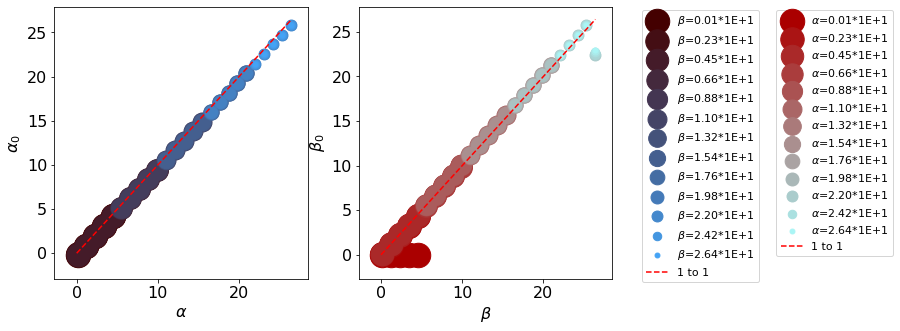

In [583]:
fs = 16
fig, ax = plt.subplots(1,2, figsize=(10,5))
markersize = 600

l_alpha = np.linspace(0,np.max(set_of_alphas),len(set_of_alphas))
l_beta = np.linspace(0,np.max(set_of_betas),len(set_of_betas))
ax[0].plot(l_alpha,l_alpha,'--r',label='1 to 1')
ax[1].plot(l_beta,l_beta,'--r',label='1 to 1')

ms = np.ceil(markersize/len(set_of_alphas))
c = np.linspace(0.0,1.0,len(set_of_alphas)+1)
for i, alpha in enumerate(set_of_alphas):
    df_temp = df.where(df.alpha==alpha).dropna()
    df_temp.sort_values(by='beta', inplace=True)
    betas_temp = df_temp.beta.values
    beta_0s = df_temp.beta_0.values
    gs = np.array([[1.0/1.5, c[i]/1.0, c[i]/1.0]])
    if np.mod(i,2) == 0 or i==len(set_of_alphas)-1:
        l = alpha/10.0
        label = r'$\alpha$=%.2f*1E+1' %l
        ax[1].scatter(betas_temp,beta_0s,c=gs,label=label,s=markersize-ms*i)
    else:
        ax[1].scatter(betas_temp,beta_0s,c=gs,s=markersize-ms*i)
ms = np.ceil(markersize/len(set_of_betas))
c = np.linspace(0.0,1.0,len(set_of_betas)+1)
for i, beta in enumerate(set_of_betas):
    df_temp = df.where(df.beta==beta).dropna()
    df_temp.sort_values(by='alpha', inplace=True)
    alphas_temp = df_temp.alpha.values
    alpha_0s = df_temp.alpha_0.values
    gs = np.array([[0.4/1.5, c[i]/1.5, c[i]/1.0]])
    if np.mod(i,2) == 0 or i==len(set_of_betas)-1:
        l = beta/10.0
        label = r'$\beta$=%.2f*1E+1' %l
        ax[0].scatter(alphas_temp,alpha_0s,c=gs,label=label,s=markersize-ms*i)
    else:
        ax[0].scatter(alphas_temp,alpha_0s,c=gs,s=markersize-ms*i)
        
## bias correction
bias_alpha, _ = curve_fit(f=bias,xdata=set_of_alphas,ydata=set_of_alpha_0)
print(r'$\alpha_0$=$\alpha$+(%.3f)' %bias_alpha)
bias_beta, _ = curve_fit(f=bias,xdata=set_of_betas,ydata=set_of_beta_0)
print(r'$\beta_0$=$\beta$+(%.3f)' %bias_beta)

lgd0 = combine_legend_subplots(0, fs=11)
lgd1 = combine_legend_subplots(1, xy=(2.13,1.01),fs=11)
ax[0].set_ylabel(r'$\alpha_0$',fontsize=fs); ax[1].set_ylabel(r'$\beta_0$',fontsize=fs);
ax[0].set_xlabel(r'$\alpha$',fontsize=fs); ax[1].set_xlabel(r'$\beta$',fontsize=fs);
ax[0].tick_params(labelsize=fs); ax[1].tick_params(labelsize=fs);
# fig.savefig(my_path.joinpath('figures/prediction.png'), 
#             bbox_extra_artists=(lgd0,lgd1), 
#             bbox_inches='tight')

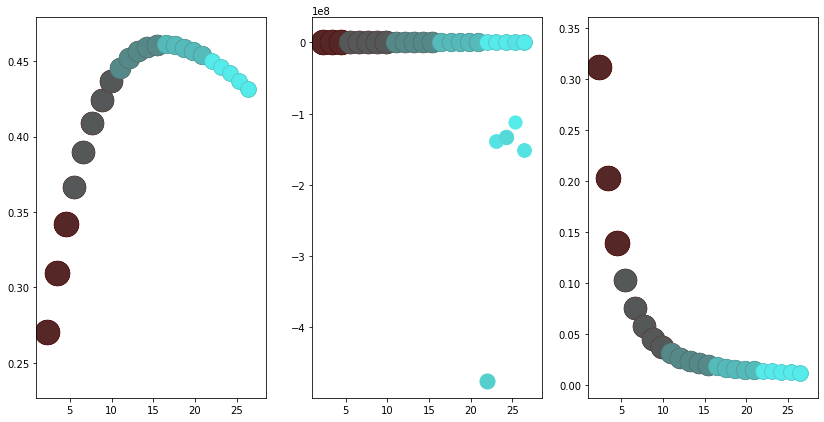

In [648]:
fs = 18
fig, ax = plt.subplots(1,3, figsize=(14,7))
amax = df.a.max()
bmax = df.b.max()
c1max = df.c1.max()
c2max = df.c2.max()
a_l = []; b_l = []
markersize = 600
# ms = np.ceil(markersize/len(set_of_betas))
ms = np.ceil(markersize/df.beta.unique().max() * 0.9) 
c = np.linspace(0.0,1.0,df.beta.unique().max()+1)
for i, alpha in enumerate(set_of_alphas):
    df_temp = df.where(df.alpha==alpha).dropna()
    df_temp.beta.values.sort()
    a_l.append(df_temp.a.values[0])
    b_l.append(df_temp.b.values[0])
    for j, beta in enumerate(df_temp.beta.values):
        temp_betas_sorted = df.beta.unique().sort()
        idx = np.where(np.sort(df.beta.unique()) == beta)[0][0]
#         import pdb; pdb.set_trace()
        gs = np.array([[0.5/1.5, c[idx]/1.0, c[idx]/1.0]])
        l = beta/10.0
        label = r'for $\beta$=%.2f*1E+1' %l
        power = 1.0
        ax[0].scatter(df_temp.alpha.values[j],
                      (df_temp.a.values[j])**(1/df_temp.c2.values[j]),
                      c=gs,
                      label=label,
                      s = markersize-ms*c[idx]*22
                     )
        ax[1].scatter(df_temp.alpha.values[j],
                      df_temp.b.values[j],
                      c=gs, 
                      s = markersize-ms*c[idx]*22
                     )
        ax[2].scatter(df_temp.alpha.values[j],
                      df_temp.c1.values[j],
                      c=gs, 
                      s = markersize-ms*c[idx]*22
                     )
        
# #         print(beta, markersize-ms*c[idx]*20, idx)
# #         if i==0:
# #             break
# #         if j==0:
# #             break
# ax[0].set_ylabel(r'a / a$_{max}$',fontsize=fs); ax[1].set_ylabel(r'b / b$_{max}$',fontsize=fs);
# ax[0].set_xlabel(r'$\alpha$',fontsize=fs); ax[1].set_xlabel(r'$\alpha$',fontsize=fs)
# ax[0].set_ylim(0,1.01); ax[1].set_ylim(0,1.01)

# a_arr = np.array(a_l); b_arr = np.array(b_l)
# amed = np.nanmedian(a_arr); bmed = np.nanmedian(b_arr)
# print(np.nanmin(a_arr))
# print(np.nanmax(a_arr))
# # amed = df.a.median()
# # bmed = df.b.median()
# aline = np.ones(len(set_of_alphas)) * amed
# bline = np.ones(len(set_of_betas)) * bmed
# ax[0].plot(set_of_alphas,aline/amax,'--r')
# ax[0].text(0.5 , amed/amax-0.1,r'Median $a$ = %.2f' %amed,color='r',fontsize=12)
# ax[1].text(0.5 , bmed/bmax-0.1,r'Median $b$ = %.2f' %bmed,color='r',fontsize=12)
# ax[1].plot(set_of_betas,bline/bmax,'--r')
# # ax[0].set_yticks([1,amed/amax])
# yt = ax[0].get_yticks() 
# yt = np.append(yt,round(amed/amax,2))
# ax[0].set_yticks(yt)
# yt = ax[1].get_yticks()
# yt = np.append(yt,round(bmed/bmax,2))
# ax[1].set_yticks(yt)
# ax[0].set_ylim(0,1.01); ax[1].set_ylim(0,1.01)
# lgd = combine_legend_subplots(0,fs=11)
# ax[0].tick_params(labelsize=fs); ax[1].tick_params(labelsize=fs);
# # fig.savefig(my_path.joinpath('figures/a_b.png'),
# #             bbox_extra_artists=(lgd,), 
# #             bbox_inches='tight')

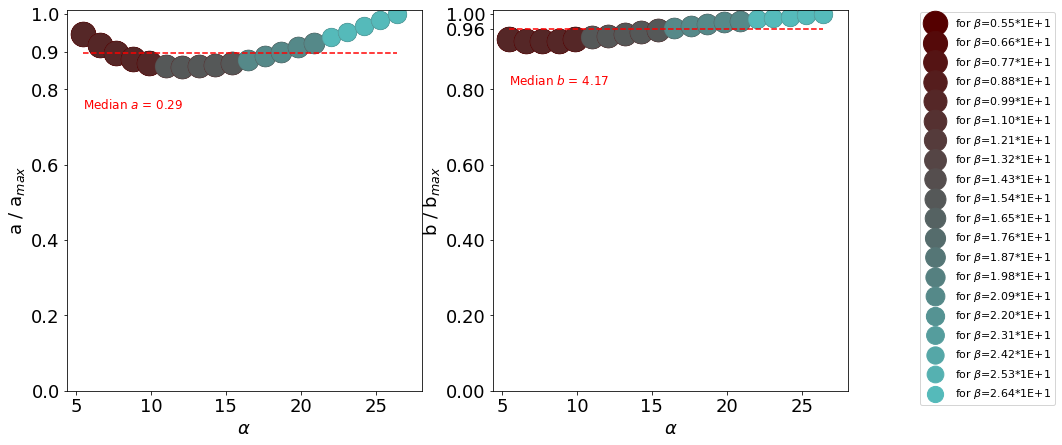

In [568]:
df_c = df.copy()
df_c = df_c.where(df_c.alpha >= 5).dropna()
df_c.reset_index(inplace=True,drop=True)
set_of_alphas_c = set_of_alphas[set_of_alphas >= 5]

fs = 18
fig, ax = plt.subplots(1,2, figsize=(14,7))
amax = df_c.a.max()
bmax = df_c.b.max()
a_l = []; b_l = []
markersize = 600
# ms = np.ceil(markersize/len(set_of_betas))
ms = np.ceil(markersize/df_c.beta.unique().max() * 0.9) 
c = np.linspace(0.0,1.0,df_c.beta.unique().max()+1)
for i, alpha in enumerate(set_of_alphas_c):
    df_temp = df_c.where(df_c.alpha==alpha).dropna()
    df_temp.beta.values.sort()
    a_l.append(df_temp.a.values[0])
    b_l.append(df_temp.b.values[0])
    for j, beta in enumerate(df_temp.beta.values):
        temp_betas_sorted = df_c.beta.unique().sort()
        idx = np.where(np.sort(df_c.beta.unique()) == beta)[0][0]
#         import pdb; pdb.set_trace()
        gs = np.array([[0.5/1.5, c[idx]/1.0, c[idx]/1.0]])
        l = beta/10.0
        label = r'for $\beta$=%.2f*1E+1' %l
        power = 1
        ax[0].scatter(df_temp.alpha.values[j],
                      df_temp.a.values[j]**power/amax**power,
                      c=gs,
                      label=label,
                      s = markersize-ms*c[idx]*22)
        ax[1].scatter(df_temp.alpha.values[j],
                      df_temp.b.values[j]/bmax,
                      c=gs, 
                      s = markersize-ms*c[idx]*22)
#         print(beta, markersize-ms*c[idx]*20, idx)
#         if i==0:
#             break
#         if j==0:
#             break
a_arr = np.array(a_l); b_arr = np.array(b_l)
ax[0].set_ylabel(r'a / a$_{max}$',fontsize=fs); ax[1].set_ylabel(r'b / b$_{max}$',fontsize=fs);
ax[0].set_xlabel(r'$\alpha$',fontsize=fs); ax[1].set_xlabel(r'$\alpha$',fontsize=fs)
ax[0].set_ylim(0,1.01); ax[1].set_ylim(0,1.01)

amed = np.nanmedian(a_arr); bmed = np.nanmedian(b_arr)
# amed = df_c.a.median()
# bmed = df_c.b.median()
aline = np.ones(len(set_of_alphas_c)) * amed
bline = np.ones(len(set_of_alphas_c)) * bmed
ax[0].plot(set_of_alphas_c,aline/amax,'--r')
ax[0].text(5.5 , amed/amax-0.15,r'Median $a$ = %.2f' %amed,color='r',fontsize=12)
ax[1].text(5.5 , bmed/bmax-0.15,r'Median $b$ = %.2f' %bmed,color='r',fontsize=12)
ax[1].plot(set_of_alphas_c,bline/bmax,'--r')
# ax[0].set_yticks([1,amed/amax])
yt = ax[0].get_yticks() 
yt = np.append(yt,round(amed/amax,2))
ax[0].set_yticks(yt)
yt = ax[1].get_yticks()
yt = np.append(yt,round(bmed/bmax,2))
ax[1].set_yticks(yt)
ax[0].set_ylim(0,1.01); ax[1].set_ylim(0,1.01)
lgd = combine_legend_subplots(0,fs=11)
ax[0].tick_params(labelsize=fs); ax[1].tick_params(labelsize=fs);
# fig.savefig(my_path.joinpath('figures/a_b_big_alphas.png'),
#             bbox_extra_artists=(lgd,), 
#             bbox_inches='tight')

In [50]:
num = 90
alpha = df.alpha.values[num]; 
beta = df.beta.values[num]; 
L = 15;
print(alpha,beta)

alpha_0med = alpha_L_inv(L,amed,alpha,bias=0.362)
beta_0med = beta_L_inv(L,bmed,beta,alpha_0med)
print(alpha_0med,beta_0med)

alpha_0 = alpha_L_inv(L,df.a.values[num],alpha,bias=0.362)
beta_0 = beta_L_inv(L,df.b.values[num],beta,alpha_0)
# alpha_0 = df.alpha_0.values[num]
# beta_0 = df.beta.values[num]
print(alpha_0,beta_0)
err = ((alpha_0-alpha_0med)/alpha_0) * 1e2
print('alpha error rate is %.3f percent' %err)
err = ((beta_0-beta_0med)/beta_0) * 1e2
print('beta error rate is %.3f percent' %err)

4.884615384615384 1.4285714285714286
-0.09981284678521785 1.0064826259188426e-15
-0.3991065639701644 0.00015181852783909268
alpha error rate is 74.991 percent
beta error rate is 100.000 percent


In [166]:
for i, L in enumerate(Ls):
    alpha_0med_all = []; beta_0med_all = []
    alpha_0_all = []; beta_0_all = []
    alpha_err = []; beta_err = []
    errs = []
    for num in range(len(df)):
        alpha = df.alpha.values[num]#/L; 
        beta = df.beta.values[num]#/L; 

        alpha_0med = alpha_L_inv(L,amed,alpha,bias=bias_alpha)#/L
        beta_0med = beta_L_inv(L,bmed,beta,alpha_0med)#/L
        alpha_0 = alpha_L_inv(L,df.a.values[num],alpha,bias=bias_alpha)#/L
        beta_0 = beta_L_inv(L,df.b.values[num],beta,alpha_0)#/L
        # alpha_0 = df.alpha_0.values[num]
        # beta_0 = df.beta.values[num]
        err1 = ((alpha_0-alpha_0med))#/alpha_0) * 1e2
#         alpha_err.append(err)
        alpha_0med_all.append(alpha_0med)
        alpha_0_all.append(alpha_0)
        err2 = ((beta_0-beta_0med))#/beta_0) * 1e2
#         if abs(err2) > 100:
#             import pdb; pdb.set_trace()
#         beta_err.append(err)
        beta_0med_all.append(beta_0med)
        beta_0_all.append(beta_0)
        errs.append((err1,err2))
    L_str = 'err_Lidx%i' %i
    df[L_str] = (errs)

In [167]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
c = np.linspace(0.0,1.0,len(set_of_alphas)+1)
c1 = np.linspace(0.4,0.0,len(set_of_alphas)+1)
for i,L in enumerate(Ls):
    alpha_err_list = []
    beta_err_list = []
    for _, alpha in enumerate(set_of_alphas):
        df_temp = df.where(df.alpha==alpha).dropna()
        row1 = df_temp.loc[df_temp.index[0]] # beta has no effect, therefore not taken
        L_str = 'err_Lidx%i' %i
        alpha_err_list.append(row1[L_str][0])
        beta_err_list.append(row1[L_str][1])
    alpha_err = np.array(alpha_err_list)
    beta_err = np.array(beta_err_list)
    gs = np.array([c1[i]/0.5, c[i]/0.5, c[i]/0.5])
    L_label = 'L=%.2f*1E+1' %(L/10.0)
    alpha_err[abs(alpha_err) > 10] = np.nan
    beta_err[abs(beta_err) > 10] = np.nan
    ax[0].plot(set_of_alphas, alpha_err, color=gs, label=L_label, linewidth=2.5)
    ax[1].plot(set_of_alphas, beta_err, color=gs, linewidth=2.5)
    
lgd = combine_legend_subplots(0, xy=(2.83,1.01), fs=11)
# ax[0].set_ylim(-200,200)
ax[0].set_ylim(-7.5,7.5)
ax[0].set_xlabel
ax[0].set_ylabel(r'Error in $\alpha_0$ [?]',fontsize=fs); 
ax[1].set_ylabel(r'Error in $\beta_0$ [?]',fontsize=fs);
ax[0].set_xlabel(r'$\alpha$',fontsize=fs); ax[1].set_xlabel(r'$\alpha$',fontsize=fs);
ax[0].tick_params(labelsize=fs); ax[1].tick_params(labelsize=fs);
fig.savefig(my_path.joinpath('figures/error.png'), 
            bbox_extra_artists=(lgd,), 
            bbox_inches='tight')

ValueError: RGBA values should be within 0-1 range

<Figure size 720x360 with 2 Axes>

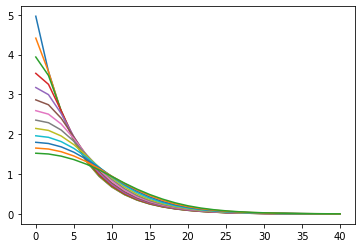

In [346]:
fig, ax = plt.subplots()
for i in range(len(Rr_mat[:,0])):
    ax.plot(hs,Rr_mat[i])

L	 Path	 Rr	 Rr_ang	 Rr_orig	 accml	 acf	 acf_original	 alpha	 
alpha_L	 alpha_L_inv	 alpha_beta	 alpha_beta_95	 ax	 beta	 beta_L	 beta_L_inv	 bias	 
combine_legend_subplots	 compute_acf	 curve_fit	 data2	 datetime	 dblquad	 eps	 factor	 fig	 
full_expr	 glob	 h	 hs	 make_hs	 my_path	 np	 nquad	 pd	 
phis	 pic	 pkl	 plt	 printing	 quad	 temp	 then	 thetas	 



In [75]:
rows = 2
cols = 2
Ls = np.linspace(0.5, 15.0, rows*cols)
hs = np.linspace(0.5, 20.0, 6)
ms_mat = np.zeros((len(Ls),len(hs)))
for i,L in enumerate(Ls):
    print(L)
    ms = []
    for h in hs:
        Rr, m = Rr_ang(h,L) # long
        ms.append(m)
    ms_mat[i,:] = np.array(ms)

0.5
5.333333333333333
10.166666666666666
15.0


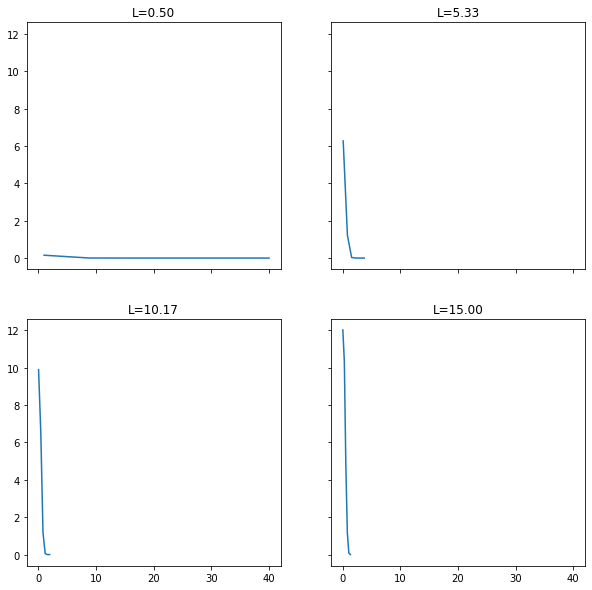

In [82]:
fig, ax = plt.subplots(rows, cols, figsize=(10,10), sharey=True, sharex=True)
l=0
for r in range(rows):
    for c in range(cols):
        ax[r,c].plot(hs/Ls[l], ms_mat[l])
        ax[r,c].set_title('L=%.2f' %Ls[l])
        l += 1


Text(0, 0.5, 'f')

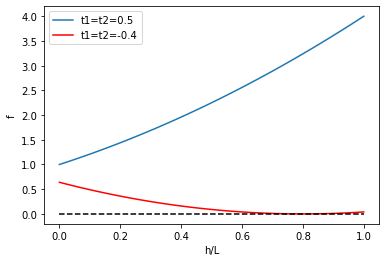

In [28]:
theta = -np.pi/2
L = 10
hs = np.linspace(0,10,70)
t2 = 0.5
t1 = t2
sq = []
def f(t1,t2,h,L,theta):
    '''The expression under the square root'''
    return (t2+(h/L))**2 + t1**2 -2*t1*(t2+(h/L))*np.sin(theta)
for h in hs:
    sq.append(f(t1,t2,h,L,theta))
sq = np.array(sq)
plt.plot(hs/L,sq,label='t1=t2=%.1f' %t1)

sq = []
t2 = -0.4
t1 = t2
for h in hs:
    sq.append(f(t1,t2,h,L,theta))
sq = np.array(sq)
plt.plot(hs/L,sq,'r',label='t1=t2=%.1f' %t1)
plt.plot(hs/L,sq*0,'--k')
plt.legend()
plt.xlabel('h/L')
plt.ylabel('f')